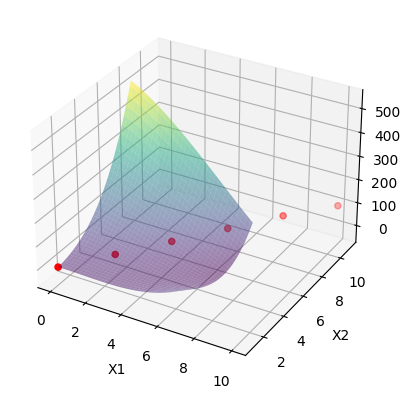

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x1 = np.array([0, 2, 4, 6, 8, 10])
x2 = np.array([1, 3, 5, 7, 9, 11])
y = np.array([2,22,44,66,88,99])

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))

model = LinearRegression()
model.fit(x_poly, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_pred, x2_pred = np.meshgrid(np.arange(0,7,0.1),np.arange(1,8,0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)

ax.scatter(x1, x2, y, c='red')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

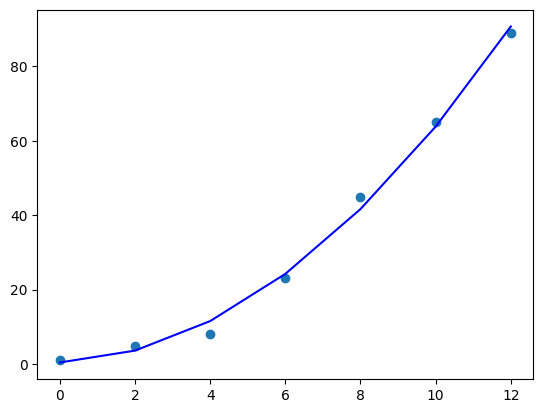

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([0,2,4,6,8,10,12])
y = np.array([1,5,8,23,45,65,89])

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1,1))

model = LinearRegression()
model.fit(x_poly,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x_poly), color = 'blue')
plt.show()

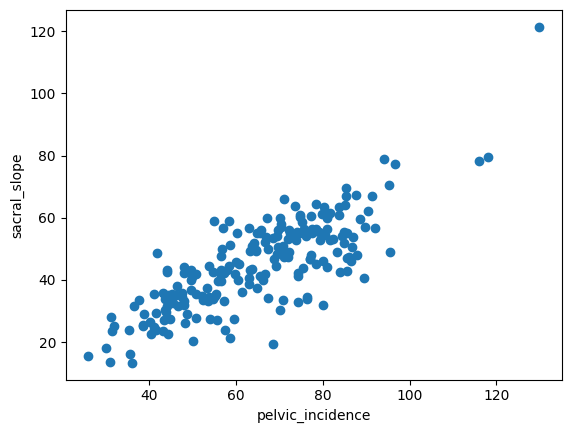

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv("/content/column_2C_weka (1).csv")

df.tail()
df.head()

abnormaldata1 = df[df['class'] =='Abnormal']
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()

0.427619799498007
0.4607746393295514


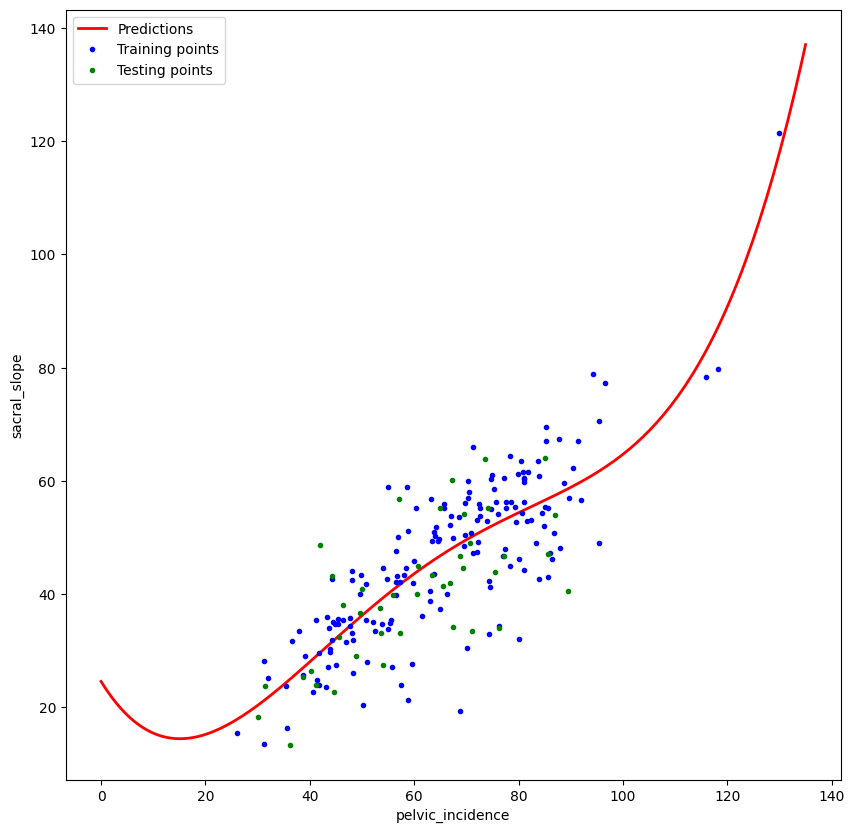

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))


X_new = np.linspace(0, 135, 200).reshape(200, 1)

X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()